$$Ejercicios 1$$

Mariann Adaliz Avila Rios...............1811303  
Arturo del Ángel de la Cruz............1809895  
Valeria Nohemí Navarro Cabello....1820160  
Magaly Rivera Valdez.....................1823340  
Sofía Pamela Rosales Garza.........1799219

Regresión lineal

1. Tomando los datos de la tabla sobre los pesos y alturas de una población de 30 personas, crea una gráfica donde el valor $x$ represente la altura y el valor $y$ represente el peso. Después traza una línea que se apegue lo más posible a los datos que graficaste.

In [90]:
datos_x = [162, 212, 220, 206, 152, 183, 167, 175, 156, 186, 183, 163, 163, 172, 194,
           168, 161, 164, 188, 187, 162, 192, 184, 206, 175, 154, 187, 212, 195, 205]
datos_y = [68.78, 74.11, 71.73, 69.88, 67.25, 68.78, 68.34, 67.01, 63.45, 71.19, 67.19, 65.80, 64.30, 67.97, 72.18,
           65.27, 66.09, 67.51, 70.10, 68.25, 67.89, 68.14, 69.08, 72.80, 67.42, 68.49, 68.61, 74.03, 71.52, 69.18]

In [91]:
import matplotlib.pyplot as plt

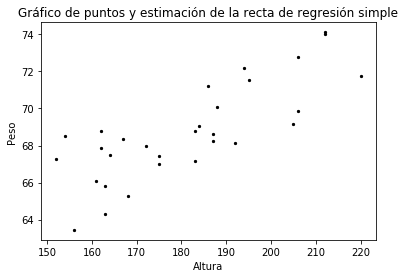

In [92]:
plt.scatter(x=datos_x , y=datos_y, marker='o', c='black', s=5)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

In [93]:
import numpy as np

In [94]:
array_x = np.array(datos_x)
array_y = np.array(datos_y)

In [95]:
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)

In [96]:
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

In [97]:
beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

In [98]:
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: ",(beta_1))
print("beta0: ",(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1:  0.1086107819535774
beta0:  49.07163369547534


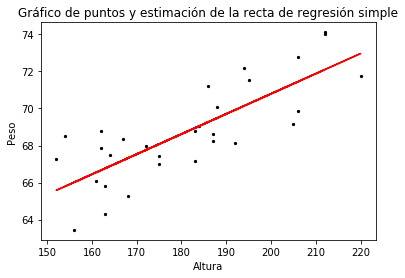

In [99]:
plt.scatter(x=datos_x , y=datos_y, marker='o', c='black', s=5)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

Reglas de asociación

2. Observa la tabla que se describe a continuación. Utilizando el agoritmo a priori, y la técnica de asociación, realiza la tabla de relaciones y resuelve cuál es el nivel K de soporte más alto al que podemos llegar teniendo un umbral de 0.5.

In [100]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [102]:
datos = np.array((["A","B","C","E"], ["B","E"], ["C","D","E"],["A","C","D"],["A","C","E"]))

In [103]:
reglas = apriori(datos, min_support = 0.5, min_confidence = 0, min_lift = 0, min_length = 1)

In [104]:
resultados = list(reglas)

In [105]:
resultados

[RelationRecord(items=frozenset({'A'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'A'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'C'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'E'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'E'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'A', 'C'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'A', 'C'}), confidence=0.6, lift=1.0), OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'C'}), confidence=1.0, lift=1.25), OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'A'}), confidence=0.7499999999999999, lift=1.2499999999999998)]),
 RelationRecord(items=frozenset({'E', 'C'}), support=0.6, ordered_statist

In [106]:
def inspect(resultados):    
    rh          = [tuple(resultado[2][0][0]) for resultado in resultados]
    lh          = [tuple(resultado[2][0][1]) for resultado in resultados]
    soporte    = [resultado[1] for resultado in resultados]
    confianza = [resultado[2][0][2] for resultado in resultados]
    lift       = [resultado[2][0][3] for resultado in resultados]
    return list(zip(rh, lh, soporte, confianza, lift))

In [107]:
resultadoDataFrame = pd.DataFrame(inspect(resultados),
                columns=['rhs','lhs','soporte','confianza','lift'])

In [108]:
resultadoDataFrame

,rhs,lhs,soporte,confianza,lift
0,(),"(A,)",0.6,0.6,1.0
1,(),"(C,)",0.8,0.8,1.0
2,(),"(E,)",0.8,0.8,1.0
3,(),"(A, C)",0.6,0.6,1.0
4,(),"(E, C)",0.6,0.6,1.0


Conclusión

Los niveles de K de soporte más alto al que podemos llegar con estos datos teniendo un soporte mínimo de 0.5 es:

Cuando K=1  
(A)  
Soporte: 0.6  
Confianza: 0.6  
Lift: 1.0  
(C)  
Soporte: 0.8  
Confianza: 0.8  
Lift: 1.0  
(E)  
Soporte: 0.8  
Confianza: 0.8  
Lift: 1.0  

Cuando K=2  
(C,A)  
Soporte: 0.6  
Confianza: 0.6  
Lift: 1.0  
  
(A->C)  
Soporte: 0.6  
Confianza: 1.0  
Lift: 1.25  
(C->A)  
Soporte: 0.6  
Confianza: 0.0.749999999999999  
Lift: 1.2499999999999998  
  
  
  
(E,C)  
Soporte: 0.6  
Confianza: 0.6  
Lift: 1.0  
  
(E->C)
Support: 0.6  
Confidence: 0.7499999999999999  
Lift:0.9374999999999998  
(C->E)  
Support: 0.6  
Confidence: 0.7499999999999999  
Lift: 0.9374999999999998  